# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

*Ответ:* мы фиксируем сид для того, чтобы получать детерминистические результаты генерации, то есть для того, чтобы получать реализации выборок с похожими свойствами.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [160]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [19]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6364ea6b7106b1dcc255cd458b8e44549cd410571a1545aaf4f5bc8b8e2d6889
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [159]:
from ydata_profiling import ProfileReport

df_full = pd.concat([df_train, df_test], ignore_index=True)
missing_columns = df_full.columns[df_train.isnull().any()].tolist()
print(f'Колонки с пропусками: {missing_columns}')

duplicates_count = df_full.duplicated().sum()
print("Количество явных дубликатов во всем датасете:", duplicates_count)

# profile = ProfileReport(df_full, minimal=False)
# profile.to_notebook_iframe()

Колонки с пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']
Количество явных дубликатов во всем датасете: 1170


*Выводы:*

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [31]:
pd.set_option('display.width', 1000) #Для корректного отображения

train_numeric_stats = df_train.describe()
test_numeric_stats = df_test.describe()

print("Основные статистики по числовым столбцам для train:")
print(train_numeric_stats)

print("\nОсновные статистики по числовым столбцам для test:")
print(test_numeric_stats)

train_categorial_stats = df_train.describe(include = ['object'])
test_categorial_stats = df_test.describe(include = ['object'])

print("Основные статистики по категориальным столбцам для train:")
print(train_categorial_stats)

print("\nОсновные статистики по категориальным столбцам для test:")
print(test_categorial_stats)

Основные статистики по числовым столбцам для train:
              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Основные статистики по числовым столбцам для test:
              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [161]:
df_train_drop_price = df_train.drop(columns = ['selling_price'])
duplicates = df_train_drop_price.duplicated(keep=False)
num_duplicates = duplicates.sum()
print("Количество дублирующихся объектов:", num_duplicates)
duplicate_rows = df_train[duplicates]
print("\nДублирующиеся объекты:")
print(duplicate_rows.head(10))

df_train = df_train.drop_duplicates(subset =df_train_drop_price.columns,keep='first')
df_train.reset_index(drop=True, inplace=True)
print("\nДатасет после удаления дубликатов:")
print(df_train)


Количество дублирующихся объектов: 1799

Дублирующиеся объекты:
                                name  year  selling_price  km_driven    fuel seller_type transmission         owner      mileage   engine   max_power               torque  seats
22           Maruti Baleno Delta 1.2  2016         575000      45000  Petrol  Individual       Manual   First Owner    21.4 kmpl  1197 CC    83.1 bhp       115Nm@ 4000rpm    5.0
26       Maruti Omni E MPI STD BS IV  2018         254999      25000  Petrol  Individual       Manual   First Owner    16.8 kmpl   796 CC    34.2 bhp        59Nm@ 2500rpm    8.0
27   Maruti Vitara Brezza LDi Option  2017         670000      70000  Diesel  Individual       Manual   First Owner    24.3 kmpl  1248 CC    88.5 bhp       200Nm@ 1750rpm    5.0
28                Fiat Palio 1.2 ELX  2003          70000      50000  Petrol  Individual       Manual  Second Owner          NaN      NaN         NaN                  NaN    NaN
29         Maruti Omni 8 Seater BSIV  2012    

In [126]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [162]:
import re

df_train['set'] = 'train'
df_test['set'] = 'test'
df_full = pd.concat([df_train, df_test], ignore_index=True)

def extract_torque_data(torque_str):
    if not isinstance(torque_str, str):
        return pd.Series([None, None])

    torque_str = torque_str.lower()
    numbers = re.findall(r'\d+\.?\d*', torque_str)
    num1, num_max = None, None
    match len(numbers):
      case 3:
         num1, _, num_max = map(float, numbers)
      case 2:
        num1, num_max = map(float, numbers)

    if num1 is not None and 'kgm' in torque_str:
        num1 *= 9.80665

    return pd.Series([num1, num_max])

def get_max_power(max_power_str):
  if not isinstance(max_power_str, str):
    return None
  if max_power_str:
    a = str(max_power_str).split(' ')[0]
    if a != '':
      return float(a)

  return None



df_full['mileage'] = df_full['mileage'].apply(lambda x: str(x).split(' ')[0]).astype(float)
df_full['engine'] = df_full['engine'].apply(lambda x: str(x).split(' ')[0]).astype(float)
df_full['max_power'] = df_full['max_power'].apply(get_max_power)



df_full[['torque', 'max_torque_rpm']] = df_full['torque'].apply(extract_torque_data)


print(df_full[['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']])


# df_train = df_full[df_full['set'] == 'train'].drop(columns='set').reset_index(drop=True)
# df_test = df_full[df_full['set'] == 'test'].drop(columns='set').reset_index(drop=True)


      mileage  engine  max_power      torque  max_torque_rpm
0       23.40  1248.0      74.00  190.000000          2000.0
1       21.14  1498.0     103.52  250.000000          2500.0
2       23.00  1396.0      90.00  219.668960          2750.0
3       16.10  1298.0      88.20  112.776475           500.0
4       20.14  1197.0      81.86  113.750000          4000.0
...       ...     ...        ...         ...             ...
6835    19.81  1086.0      68.05   99.040000          4500.0
6836    18.60  1197.0      81.83  114.700000          4000.0
6837    23.00  1396.0      90.00  219.668960          2750.0
6838    20.36  1197.0      78.90  111.800000          4000.0
6839    26.00  1498.0      98.60  200.000000          1750.0

[6840 rows x 5 columns]


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [163]:
df_train = df_full[df_full['set'] == 'train'].drop(columns='set').reset_index(drop=True)

mileage_median = df_train['mileage'].median()
engine_median = df_train['engine'].median()
max_power_median = df_train['max_power'].median()
torque_median = df_train['torque'].median()
max_torque_rpm_median = df_train['max_torque_rpm'].median()
seats_median = df_train['seats'].median()

df_full['mileage'].fillna(mileage_median, inplace=True)
df_full['engine'].fillna(engine_median, inplace=True)
df_full['max_power'].fillna(max_power_median, inplace=True)
df_full['torque'].fillna(torque_median, inplace=True)
df_full['max_torque_rpm'].fillna(max_torque_rpm_median, inplace=True)
df_full['seats'].fillna(seats_median, inplace=True)

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [164]:
df_full['engine'] = df_full['engine'].astype(int)
df_full['seats'] = df_full['seats'].astype(int)

`Your answer here`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [136]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5654.00000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,175.194883,5.44075,2920.438014
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,116.344280,0.99527,1016.818753
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.071920,2.00000,0.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.00000,2200.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.00000,2800.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.000000,5.00000,3750.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,3726.527000,14.00000,5300.000000


`Your answer here`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

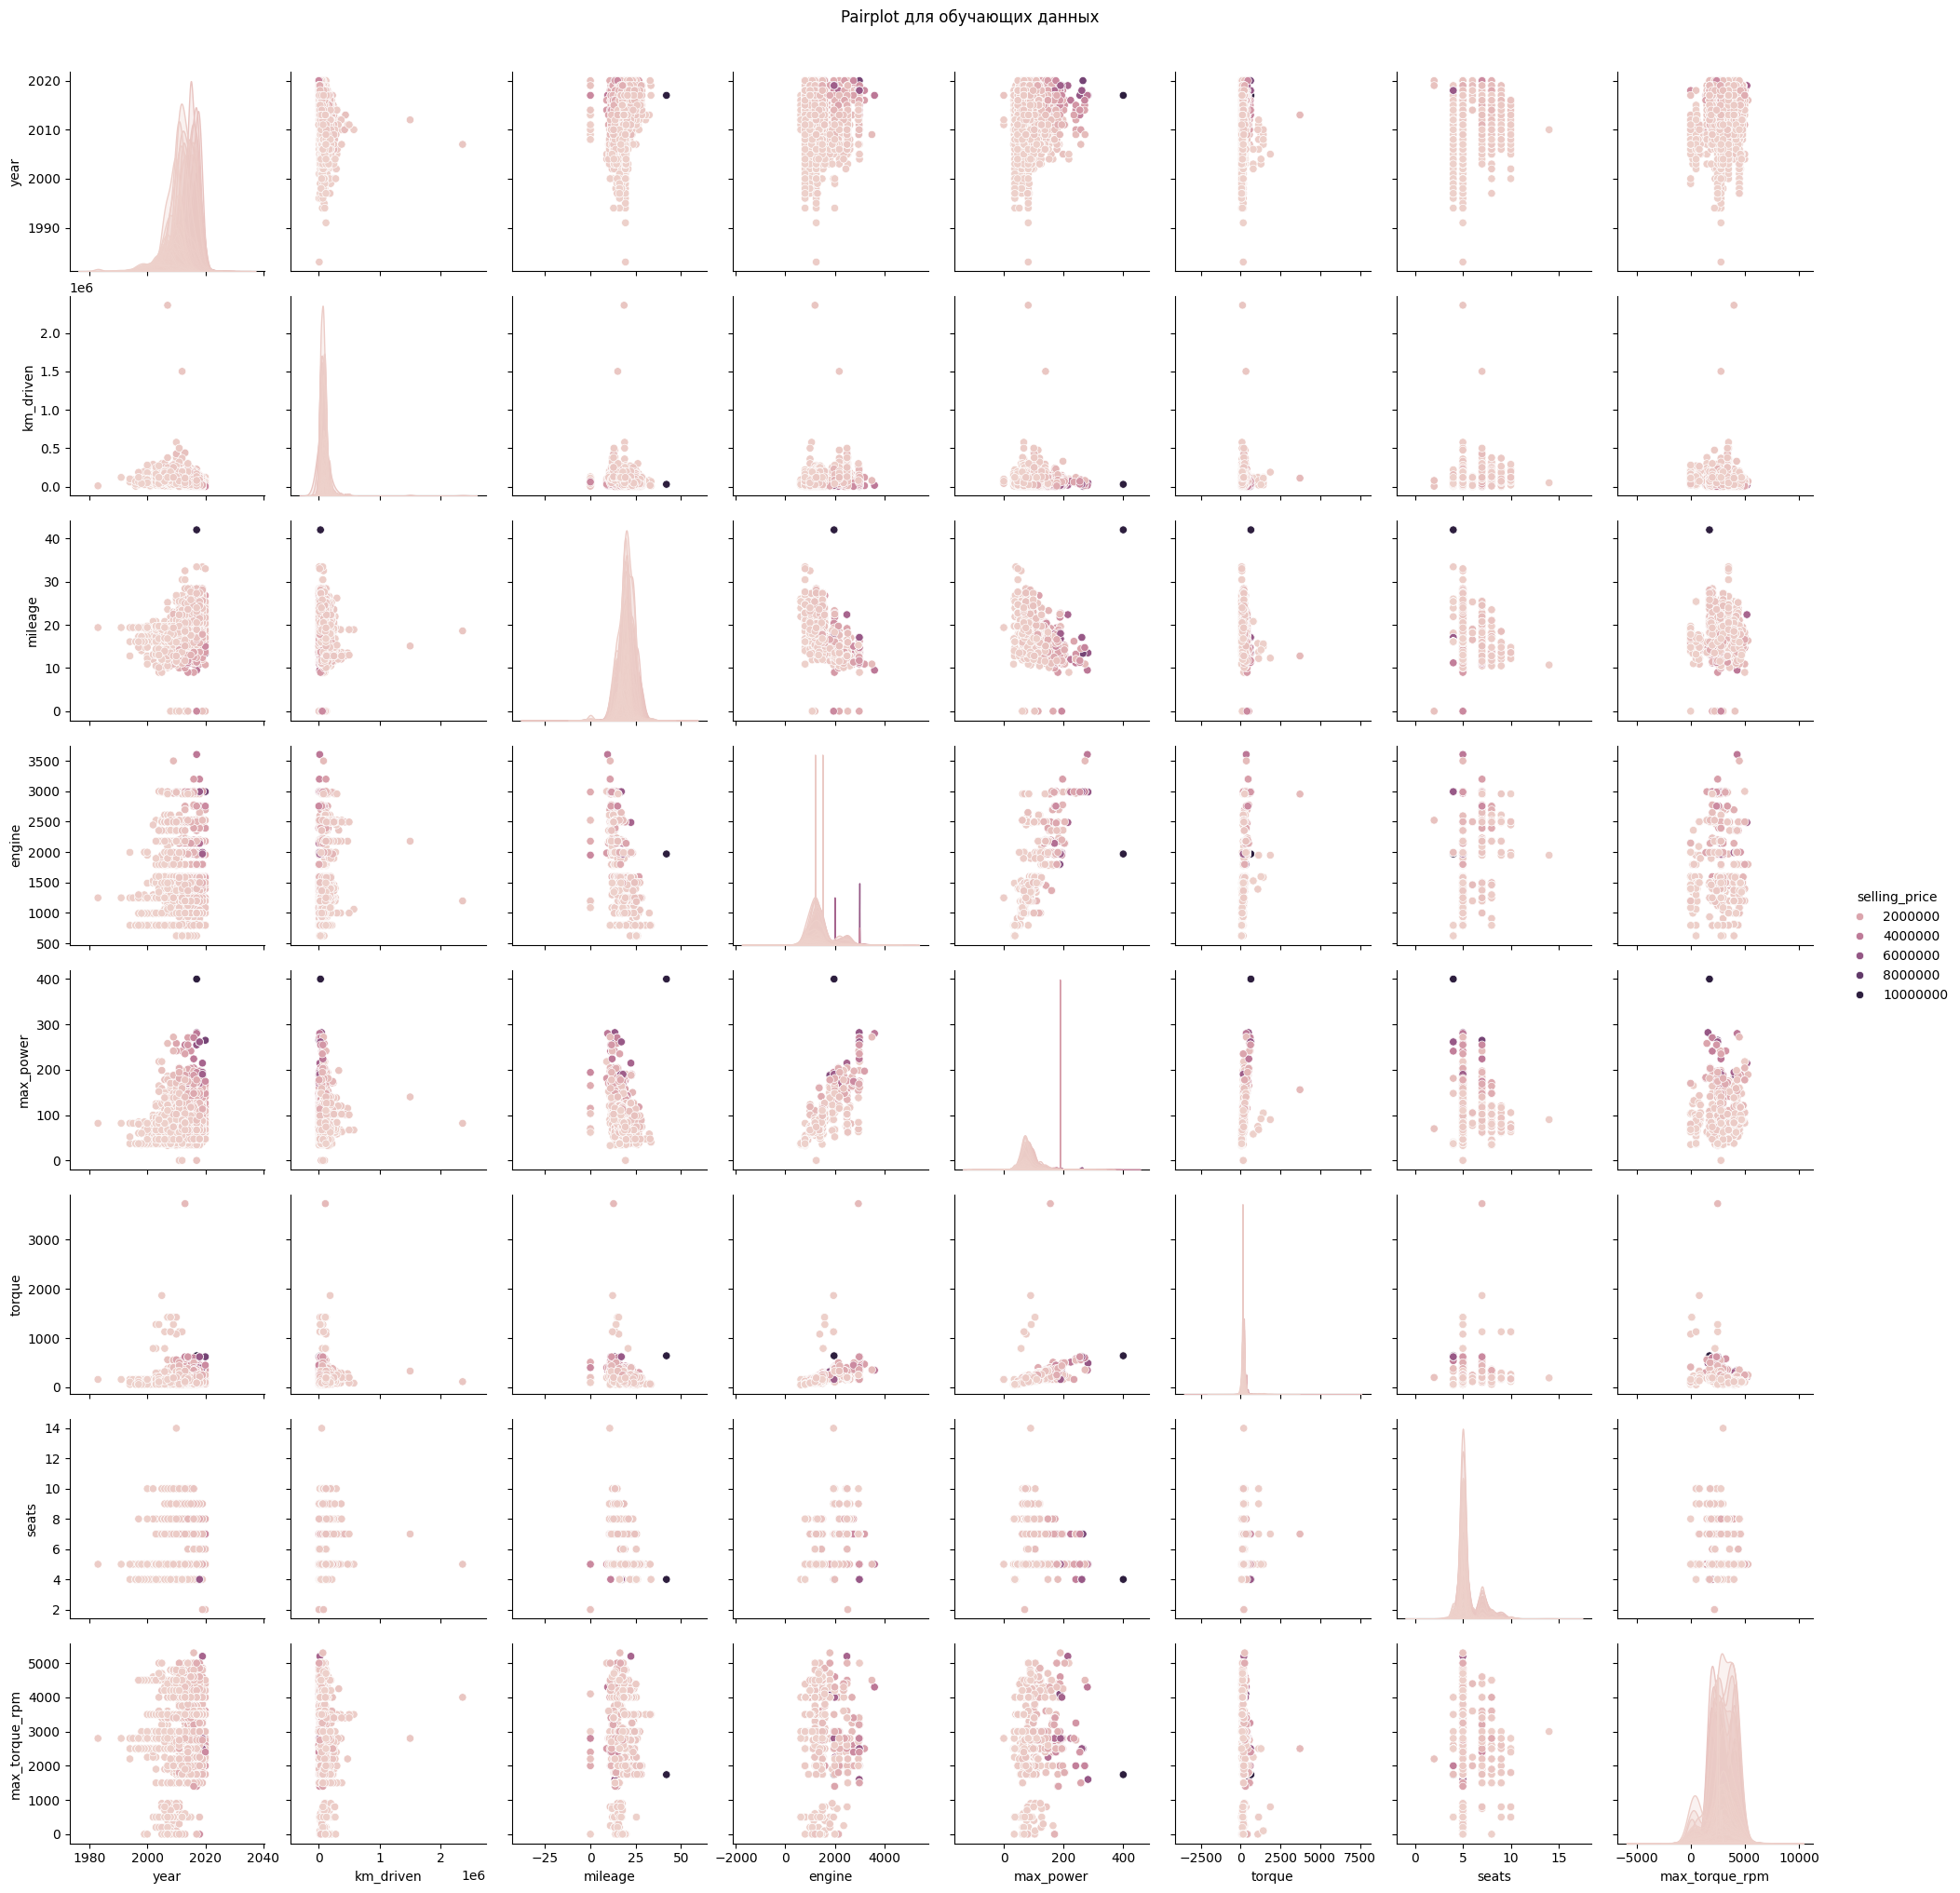

In [140]:
df_train = df_full[df_full['set'] == 'train'].drop(columns='set').reset_index(drop=True)
df_test = df_full[df_full['set'] == 'test'].drop(columns='set').reset_index(drop=True)
import seaborn as sns
import matplotlib.pyplot as plt


# Построение pairplot
sns.pairplot(df_train, hue='selling_price')
plt.suptitle('Pairplot для обучающих данных', y=1.02)  # Поднятие заголовка
plt.show()


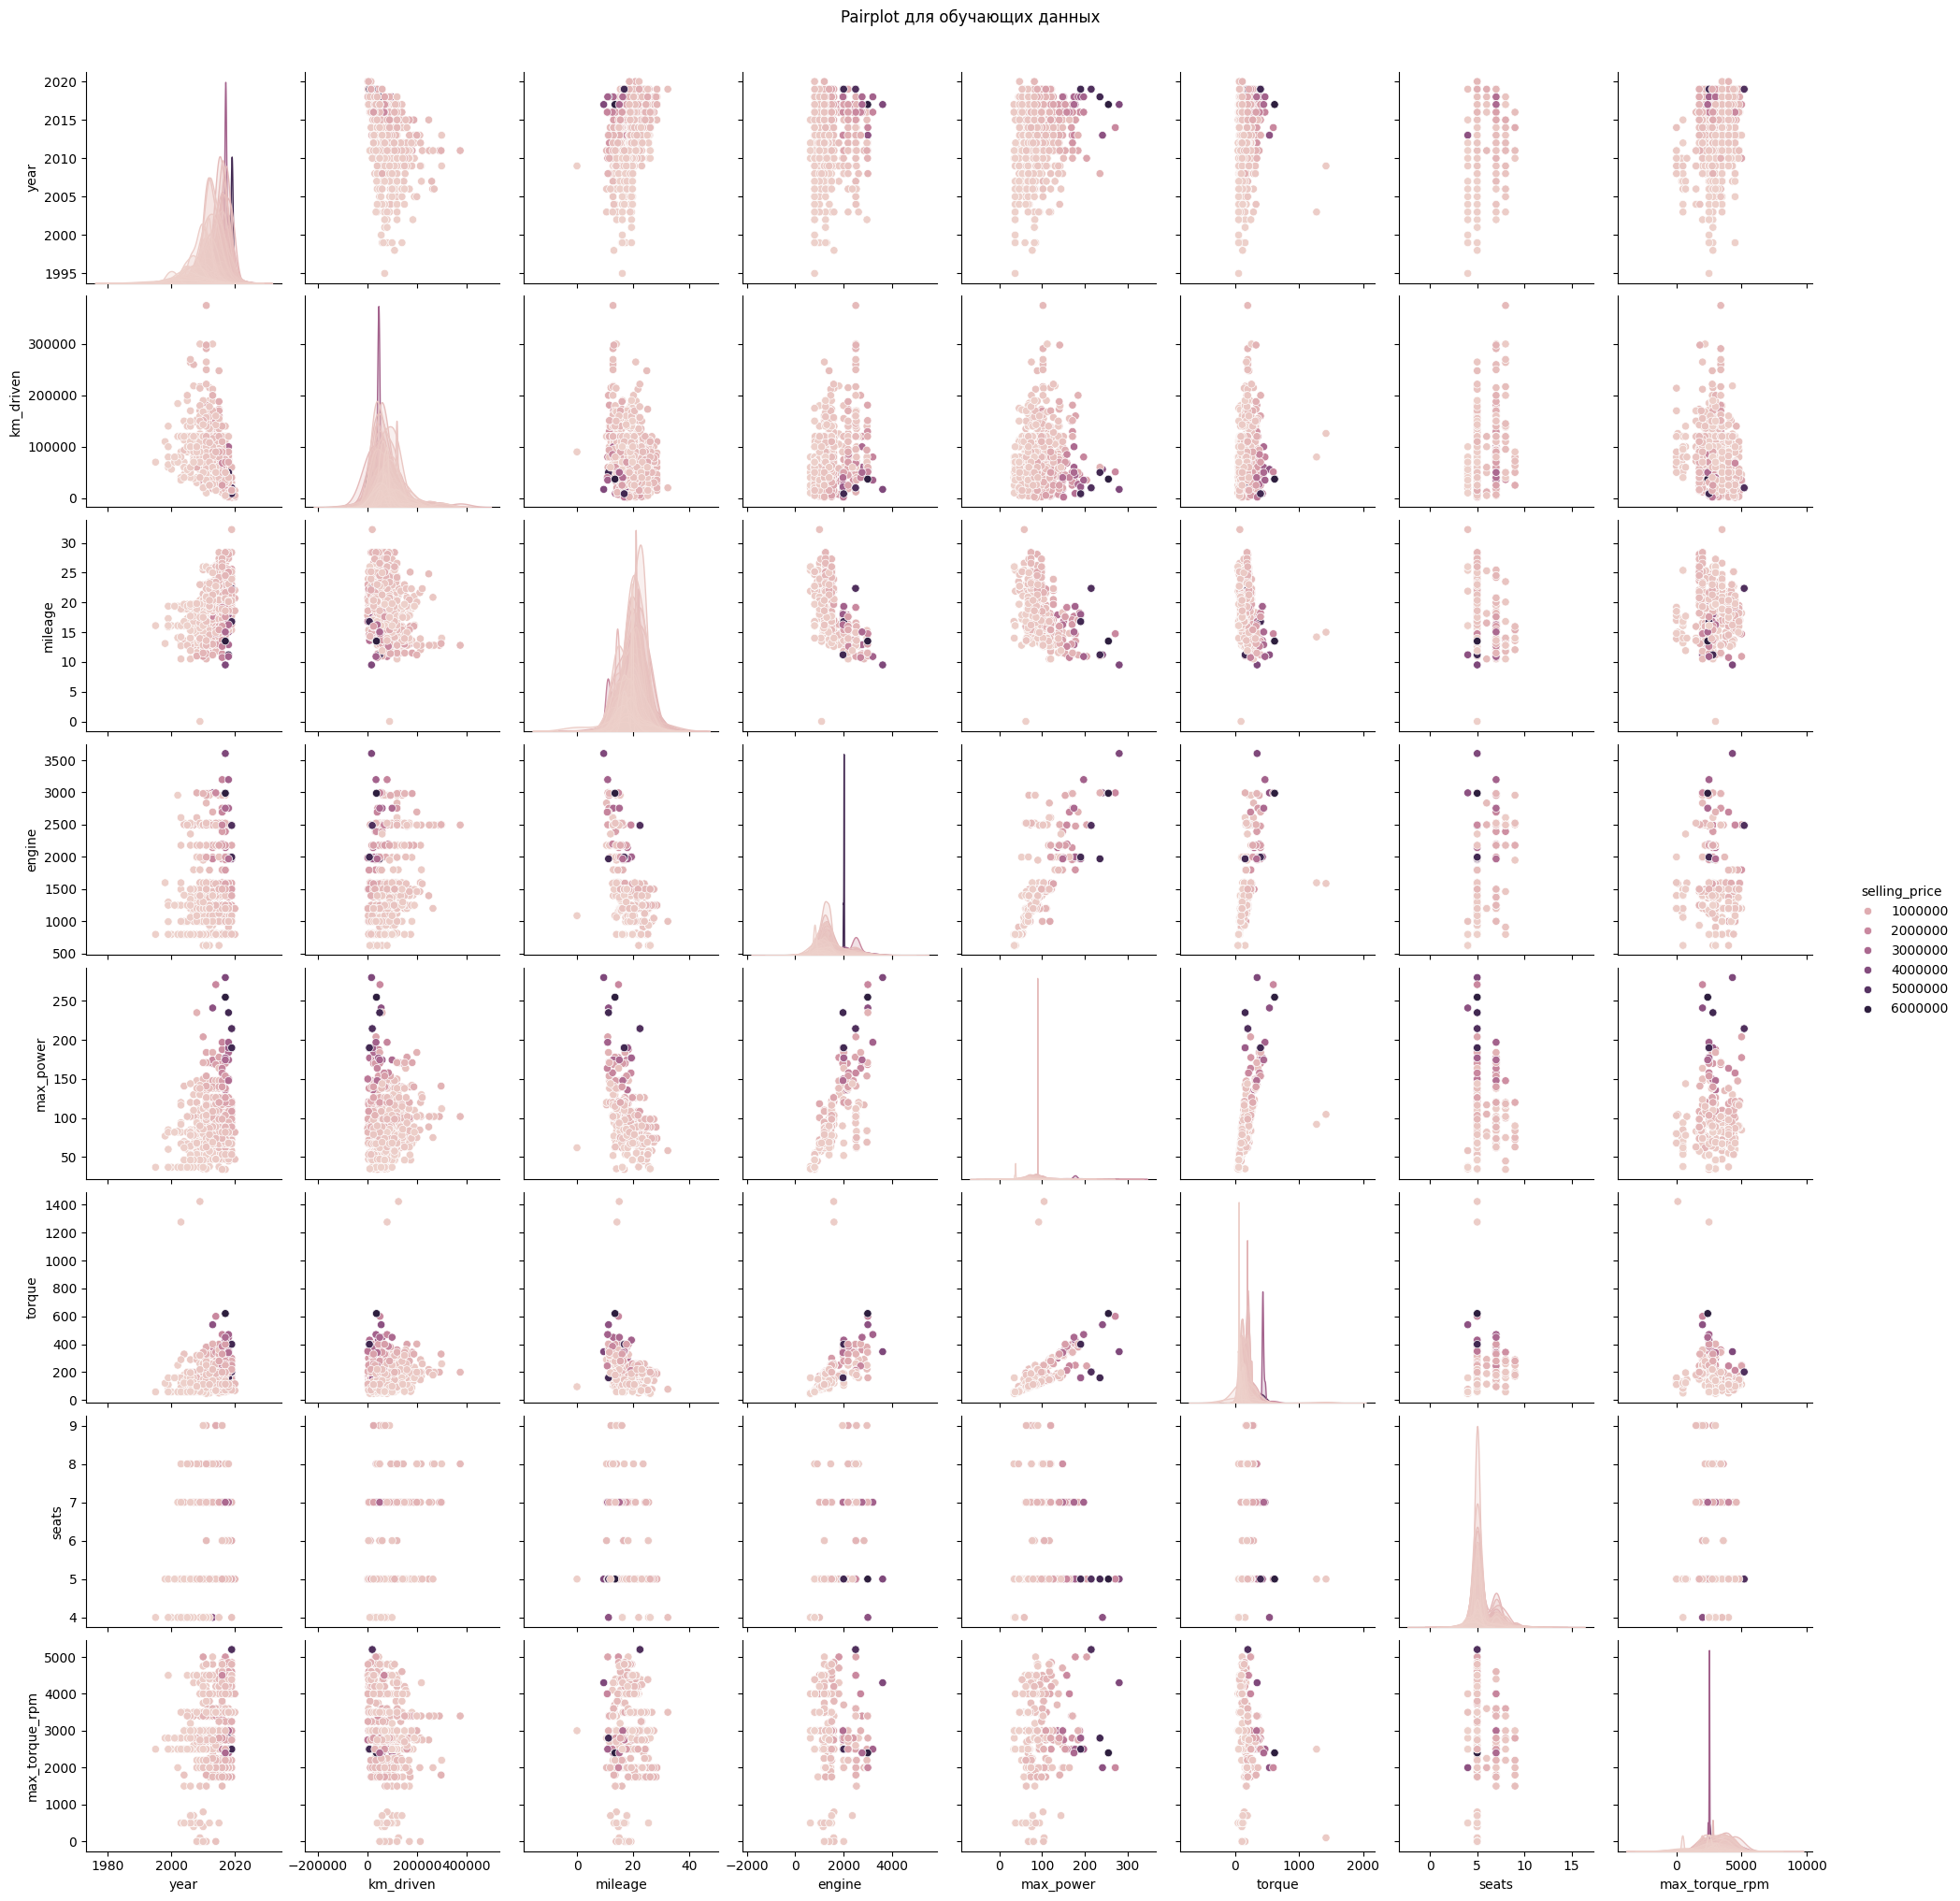

In [141]:
sns.pairplot(df_test, hue='selling_price')
plt.suptitle('Pairplot для тестовых данных', y=1.02)  # Поднятие заголовка
plt.show()

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

                    year  selling_price  km_driven   mileage    engine  max_power    torque     seats  max_torque_rpm
year            1.000000       0.427279  -0.368966  0.341334  0.002819   0.156858  0.054266  0.041178        0.200781
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   0.692814  0.427025  0.149953       -0.004596
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   0.024588  0.104427  0.192328       -0.229860
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893  -0.373390 -0.220657 -0.451059       -0.070873
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   0.681117  0.559684  0.652172       -0.211136
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   1.000000  0.605761  0.244112        0.008289
torque          0.054266       0.427025   0.104427 -0.220657  0.559684   0.605761  1.000000  0.297958       -0.307125
seats           0.041178       0.149953   0.192328 -0.45

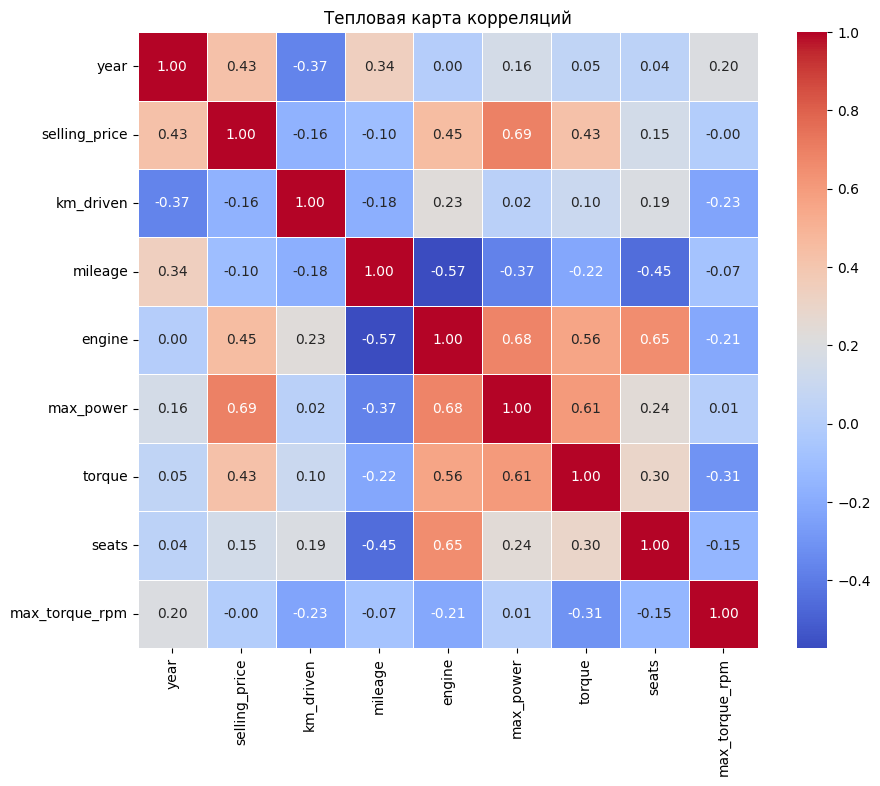

In [143]:
numeric_df_train = df_train.select_dtypes(include='number')
correlation_matrix = numeric_df_train.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
год/мощность, год/любая техническая характеристика.
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 engine/max_power - выглядит логично
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- год/мощность, год/любая техническая характеристика.
- engine/max_power - выглядит логично
- По нашим, данным они имеют довольно слабую связь, но это не противоречит здравому смыслу, поэтому можно.


### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [ ]:
# your code here

`Your answer here`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [175]:
df_full_numeric = df_full.select_dtypes('number')
df_train = df_full[df_full['set'] == 'train'].drop(columns='set').reset_index(drop=True)
y_train = df_train['selling_price']
X_train = df_train.select_dtypes('number').drop(columns='selling_price').reset_index(drop=True)
print(X_train)

      year  km_driven  mileage  engine  max_power      torque  seats  max_torque_rpm
0     2014     145500    23.40    1248      74.00  190.000000      5          2000.0
1     2014     120000    21.14    1498     103.52  250.000000      5          2500.0
2     2010     127000    23.00    1396      90.00  219.668960      5          2750.0
3     2007     120000    16.10    1298      88.20  112.776475      5           500.0
4     2017      45000    20.14    1197      81.86  113.750000      5          4000.0
...    ...        ...      ...     ...        ...         ...    ...             ...
5835  2008     191000    17.92    1086      62.10   96.100000      5          3000.0
5836  2013      50000    18.90     998      67.10   90.000000      5          3500.0
5837  2013     110000    18.50    1197      82.85  113.700000      5          4000.0
5838  2007     119000    16.80    1493     110.00  160.000000      5          2800.0
5839  2009     120000    19.30    1248      73.90  190.000000    

In [176]:
assert X_train.shape == (5840, 8)

In [181]:
df_test = df_full[df_full['set'] == 'test'].drop(columns='set').reset_index(drop=True)
y_test = df_test['selling_price']
X_test = df_test.select_dtypes('number').drop(columns='selling_price').reset_index(drop=True)

In [182]:
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# MSE
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

# R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
print(f"Train R^2: {r2_train:.2f}, Test R^2: {r2_test:.2f}")


Train MSE: 115327892696.04, Test MSE: 230653394421.46
Train R^2: 0.60, Test R^2: 0.60


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [185]:
def calculate_r_squared(y_true, y_pred):
    y_mean = y_true.mean()

    ss_res = mean((y_true - y_pred) ** 2) # оценивает дисперсию между y_true, y_pred

    ss_tot = mean((y_true - y_mean) ** 2) # оценивает дисперсию между y_true, y_mean

    r_squared = 1 - (ss_res / ss_tot) # Отношение берется с целью нормировки, имеет интерпретацию: как доля необъясненной моделью дисперсии

    return r_squared

`Your answer here`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [ ]:
def calculate_adjusted_r_squared(y_true, y_pred, p):
    n = len(y_true)
    r_squared = calculate_r_squared(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    return adjusted_r_squared

`Основная разница заключается в том, что в adjusted версии мы берем несмещенные оценки дисперсии и после раскрытия скобок получаем формулу. Используется для того, чтобы сравнивать модели, независимо от кол-ва параметров.`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [189]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
print(pipeline)

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
print(f"Train R^2: {r2_train:.2f}, Test R^2: {r2_test:.2f}")


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])
Train MSE: 115327892696.04, Test MSE: 230653394421.46
Train R^2: 0.60, Test R^2: 0.60


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [195]:
coefficients = pipeline.named_steps['regressor'].coef_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
most_informative_feature = feature_importance.loc[feature_importance['Absolute Coefficient'].idxmax()]

print(feature_importance[['Feature', 'Absolute Coefficient']])

          Feature  Absolute Coefficient
0            year         166427.590564
1       km_driven          47323.043787
2         mileage           8539.569439
3          engine          36230.265085
4       max_power         331685.637368
5          torque           1399.908201
6           seats          24455.082930
7  max_torque_rpm          45275.063100


`Ответ: max_power`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [202]:
from sklearn.linear_model import Lasso
from sklearn import set_config
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])
set_config(display='diagram')

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
print(f"Train R^2: {r2_train:.2f}, Test R^2: {r2_test:.2f}")

coefficients = pipeline.named_steps['regressor'].coef_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
most_informative_feature = feature_importance.loc[feature_importance['Absolute Coefficient'].idxmax()]

print(feature_importance[['Feature', 'Coefficient']])

Train MSE: 115327892713.78, Test MSE: 230654216373.48
Train R^2: 0.60, Test R^2: 0.60
          Feature    Coefficient
0            year  166427.177572
1       km_driven  -47321.850912
2         mileage    8537.781889
3          engine   36225.298825
4       max_power  331684.461005
5          torque   -1396.175753
6           seats  -24452.433634
7  max_torque_rpm  -45273.335516


### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [ ]:
# your code here

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [ ]:
# your code here

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# your code here

In [ ]:
assert X_train_cat.shape == (5840, 11)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>